# 3. 神经网络与深度学习

## 3.1 Fashion-MNIST 数据集的起源
* 计算机程序一般由两个主要部分组成：代码和数据
* 对于深度学习而言，软件即为网络本身，尤其是在训练过程中通过训练产生的权重
* 神经网络程序员的工作是通过训练来监督和指导学习过程(可以看做是编写软件或代码的间接方式)

### 3.1.1 Fashion-MNIST数据集
* MNIST是非常著名的手写数字数据集 (M:Modify; NIST: National Institute of Standard and Technology)
* MNIST中共有7万张图像：6万张用于训练；1万张用于测试；共0—9十个类别
* Fashion-MNIST数据集来自Zalando网站：10类别对应10种服饰；7万张 28x28的灰度图像
* Fashion-MNIST的目的是取代MNIST数据集，用作基准来测试机器学习算法
* Fashion-MNIST与MNIST数据集的异同：(1)异：MNIST数据集中图像都是手写图像，而Fashion-MNIST中的是真实图像；(2)同：这两个数据集具有相同的数据规模，图像大小，数据格式，以及训练集和测试集的分割方式
* MNIST为何如此受欢迎：1.该数据集的规模允许深度学习研究者快速地检查和复现它们的算法；2.在所有的深度学习框架中都能使用该数据集
* Pytorch中的torchvision包可以加载fashion-mnist数据集

## 3.2 使用torchvision导入和加载数据集

### 3.2.1 创建深度学习项目的流程：
1. 准备数据集
2. 创建网络模型
3. 训练网络模型
4. 分析结果

### 3.2.2 数据准备遵守ETL过程：
* 提取(extract)、转换(transform)、加载(load)
* pytorch中自带的包，能够将ETL过程变得简单

### 3.2.3 数据的准备：
* 1.提取：从源数据中获取fashion-mnist图像数据
* 2.转换：将数据转换成张量的形式
* 3.加载：将数据封装成对象，使其更容易访问
* * Fashion-MNIST 与 MNIST数据集在调用上最大的不同就是URL的不同
* * torch.utils.data.Dataset:一个用于表示数据集的抽象类
* * torch.utils.data.DataLoader: 包装数据集并提供对底层的访问

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms # 可帮助对数据进行转换

In [2]:
train_set = torchvision.datasets.FashionMNIST(
    root = './data/FashionMNIST',   # 数据集在本地的存储位置
    train = True,                   # 数据集用于训练
    download = True,                # 如果本地没有数据，就自动下载
    transform = transforms.Compose([
        transforms.ToTensor()       # 将图像转换成张量
    ])                              
)

In [10]:
# 训练集被打包或加载到数据加载器中，可以以我们期望的格式来访问基础数据；
# 数据加载器使我们能够访问数据并提供查询功能
train_loader = torch.utils.data.DataLoader(train_set, batch_size=10)

## 3.3 数据集的访问

In [11]:
import numpy as np
import matplotlib.pyplot as plt

torch.set_printoptions(linewidth=120)     # 设置打印行宽

In [12]:
print(len(train_set))
print(train_set.targets)
print(train_set.targets.bincount())    # bincount:张量中每个值出现的频数

60000
tensor([9, 0, 0,  ..., 3, 0, 5])
tensor([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000])


查看单个样本

In [13]:
sample = next(iter(train_set))
print(len(sample))
print(type(sample))

2
<class 'tuple'>


In [14]:
image, label = sample
image.shape

torch.Size([1, 28, 28])

label: 9


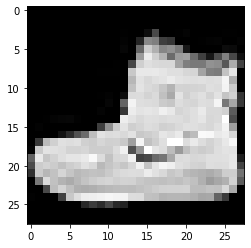

In [15]:
plt.imshow(image.squeeze(), cmap='gray')    # 将[1, 28, 28]->[28,28]
print('label:', label)

In [16]:
batch= next(iter(train_loader))
print(len(batch))
print(type(batch))

2
<class 'list'>


In [17]:
images, labels = batch
print(images.shape)
print(labels.shape)

torch.Size([10, 1, 28, 28])
torch.Size([10])


torch.Size([3, 32, 302])
labels: tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5])


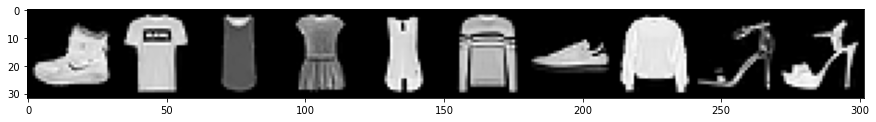

In [18]:
# 画出一批的图像
grid= torchvision.utils.make_grid(images,nrow =10)
print(grid.shape)
plt.figure(figsize=(15, 15))
plt.imshow(np.transpose(grid,(1,2,0)))   # 将张量转换成矩阵
print('labels:', labels)
# 可以通过改变batchsize来显示更多的数据

## 3.4 网络建立

In [19]:
import torch.nn as nn

In [20]:
class Network(nn.Module):   #()中加入nn.Module可以使得Network类继承Module基类中的所有功能
    def __init__(self):
        super().__init__()     # 对继承的父类的属性进行初始化，使用父类的方法来进行初始化
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)
        self.fc1 = nn.Linear(in_features=12*4*4, out_features=120)        # 从卷积层传入线性层需要对张量flatten
        self.fc2 = nn.Linear(in_features=120, out_features=60)
        self.out = nn.Linear(in_features=60, out_features=10)
    def forward(self, t):
        # implement the forward pass
        return t

In [21]:
network = Network()   
network

Network(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=192, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=60, bias=True)
  (out): Linear(in_features=60, out_features=10, bias=True)
)

## 3.5 CNN构建及网络参数的使用
在上述的Network类中，我们定义了两个卷积层和一个线性层；两个主要的部分封装在其中，即前向函数的定义和权重张量；每个层中权重张量包含了随着我们的网络在训练过程中学习而更新的权重值（这就是在网络类中将层定义为类属性的原因）；在Module类中，pytorch可以跟踪每一层的权重张量，由于我们在创建Network类时扩展了Module类，也就自动继承了该功能。
- Parameter和Argument的区别：
    - Parameter在函数定义中使用，可将其看作是占位符；(形参)
    - Argument是当函数被调用时传递给函数的实际值；（实参）
- Parameter的两种类型：
    - 1.Hyperparameters:其值是手动和任意确定的；要构建神经网络：kernel_size, out_channels, out_features都需要手动选择
    - 2.Data dependent Hyperparameters:其值是依赖于数据的参数
        - 该参数位于网络的开始或末端，即第一个卷积层的输入通道和最后一个卷积层的输出特征图
        - 第一个卷积层的输入通道依赖于构成训练集的图像内部的彩色通道的数量（灰度图像是1，彩色图像是3）
        - 输出层的输出特征依赖于训练集中类的数量（fashion-MNIST数据集中的类型为10，则输出层的out_features=10）
        - 通常情况下，一层的输入是上一层的输出（即：卷积层中所有输入通道和线性层中的输入特征都依赖于上一层的数据）
- 当张量从卷积层传入线性层时，张量必须是flatten的

|     Parameter     |     Description      |
|:----------------------|:-------------------------|
|kernel_size| 设置滤波器的大小；滤波器的数量就是输出通道数|
|out_channels| 设置滤波器的数量，即为输出通道数|
|out_features| 设置输出张量的大小|

## 3.6 CNN的权重
* 可学习参数：是在训练过程中学习的参数，初值是选择的任意值，其值在网络学习的过程中以迭代的方式进行更新
* 说网络在学习是指：网络在学习参数的适合的值，适合的值就是能使损失函数最小化的值
* 可学习的参数是网络的权重，存在于每一层中
* 当我们扩展类的时候，我们会得到它的所有功能，为了得到它，我们可以添加额外的功能，也可覆盖现有的功能
* 在python中，所有特殊的面向对象的方法通常都有前双下划线和后双下划线（__init__, __repr__）

### 3.6.1 访问特定的权重

In [22]:
network.conv1

Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))

In [23]:
network.conv1.weight

Parameter containing:
tensor([[[[ 1.2478e-01,  1.5237e-01, -5.3154e-02,  1.0505e-01, -1.6347e-01],
          [-1.0542e-01,  3.6026e-02,  1.6797e-01,  2.5604e-02,  3.9906e-02],
          [ 1.6898e-01, -6.2535e-02,  1.6830e-01, -3.9020e-02, -1.9487e-01],
          [ 8.3084e-02, -1.5005e-02,  1.3440e-01, -5.1831e-02,  4.6357e-02],
          [-1.5071e-01,  6.5421e-02,  6.3349e-02,  9.0113e-02, -2.2378e-02]]],


        [[[-1.2649e-01,  1.0580e-01,  9.6268e-02,  1.8533e-01,  1.9105e-02],
          [ 1.9299e-01, -3.7906e-02, -1.5442e-01, -1.6634e-01,  1.5076e-01],
          [ 2.5126e-02,  1.6097e-01,  1.5910e-01,  9.8396e-02,  1.2829e-02],
          [ 1.8557e-01, -5.4679e-04, -1.9060e-01, -8.4249e-02,  6.8614e-02],
          [ 8.1574e-02,  8.4190e-02,  9.2196e-02,  1.7689e-01,  1.5620e-01]]],


        [[[ 1.9961e-01,  9.7315e-02,  4.6296e-02, -4.8586e-02, -1.3200e-01],
          [ 5.4012e-02, -1.5784e-01, -1.1786e-01,  4.4024e-02, -1.3496e-01],
          [ 7.7988e-02,  1.5493e-01,  8.6647e-

In [24]:
network.conv1.weight.shape

torch.Size([6, 1, 5, 5])

In [25]:
network.fc1.weight.shape

torch.Size([120, 192])

### 3.6.2 访问所有权重

In [26]:
for param in network.parameters():
    print(param.shape)

torch.Size([6, 1, 5, 5])
torch.Size([6])
torch.Size([12, 6, 5, 5])
torch.Size([12])
torch.Size([120, 192])
torch.Size([120])
torch.Size([60, 120])
torch.Size([60])
torch.Size([10, 60])
torch.Size([10])


In [27]:
for name, param in network.named_parameters():
    print(name,'\t\t', param.shape)

conv1.weight 		 torch.Size([6, 1, 5, 5])
conv1.bias 		 torch.Size([6])
conv2.weight 		 torch.Size([12, 6, 5, 5])
conv2.bias 		 torch.Size([12])
fc1.weight 		 torch.Size([120, 192])
fc1.bias 		 torch.Size([120])
fc2.weight 		 torch.Size([60, 120])
fc2.bias 		 torch.Size([60])
out.weight 		 torch.Size([10, 60])
out.bias 		 torch.Size([10])


## 3.8 CNN前向方法的实现
* 前向方法的实现将使用我们在构造函数中定义的所有层
* 前向方法实际上是输入张量到预测的输出张量的映射

### 3.8.1 Input Layer
* 输入层是由输入数据决定的
* 输入层可以看做是恒等变换 f(x)=x
* 输入层通常是隐式存在的

In [28]:
import torch.nn.functional as F

In [29]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)
        self.fc1 = nn.Linear(in_features=12*4*4, out_features=120)
        self.fc2 = nn.Linear(in_features=120,out_features=60)
        self.out = nn.Linear(in_features=60, out_features=10)
    def forward(self,t):
        # (1) input layer
        t = t
        # (2) hidden conv layer1
        t = self.conv1(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size=2, stride=2)
        # (3) hidden conv layer2
        t = self.conv2(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size=2, stride=2)
        # relu 和 max pooling 都没有权重；激活层和池化层的本质都是操作而非层；层与操作的不同之处在于，层有权重，操作没有
        #（4）hidden linear layer2
        t = t.reshape(-1, 12*4*4)
        t = self.fc1(t)
        t = F.relu(t)
        # (5) hidden linear layer2
        t = self.fc2(t)
        t = F.relu(t)
        # (6) output layer
        t = self.out(t)
        # t= F.softmax(t, dim=1)  # 这里暂不使用softmax，在训练中使用交叉熵损失可隐式的表示softmax
        # 在隐藏层中，通常使用relu作为非线性激活函数
        # 在输出层，有类别要预测时，使用
        return t

## 3.9 单张图像的预测

### 3.9.1 前向传播(forward propagation)
* 是将输入张量转换为输出张量的过程（即：神经网络是将输入张量映射到输出张量的函数）
* 前向传播只是将输入张量传递给网络并从网络接收输出的过程的一个特殊名称

### 3.9.2 反向传播(back propagation)
* 反向传播通常在前向传播后发生
* 使用torch.set_grad_enabled(False)来关闭pytorch的梯度计算，这将阻止pytorch在我们的张量通过网络时构建一个计算图
* 计算图通过跟踪张量在网络中传播的每一个计算，来跟踪网络的映射；然后在训练过程中使用这个图来计算导数，也就是损失函数的梯度；关闭并非强制的，但可以减少内存。

In [30]:
torch.set_grad_enabled(False)    #关闭pytorch的梯度计算
network = Network()
sample = next(iter(train_set))
image, label = sample
print(image.shape)

torch.Size([1, 28, 28])


In [31]:
pred = network(image.unsqueeze(0))
print(pred.shape)
print(pred.argmax(dim=1))
print(label)

torch.Size([1, 10])
tensor([4])
9


In [32]:
# 要想将预测值用概率表示，可以使用softmax
print(F.softmax(pred, dim=1))
print(F.softmax(pred, dim=1).sum())

tensor([[0.0994, 0.1049, 0.0914, 0.1120, 0.1165, 0.0920, 0.1041, 0.0927, 0.1000, 0.0871]])
tensor(1.)


## 3.10 单批次图像预测

In [39]:
data_loader  = torch.utils.data.DataLoader(train_set, batch_size=10)
batch = next(iter(data_loader))
images, labels = batch

pred = network(images)
print(pred.shape)
print(pred)

torch.Size([10, 10])
tensor([[ 2.5439e-04,  5.3556e-02, -8.3966e-02,  1.1898e-01,  1.5855e-01, -7.7415e-02,  4.6632e-02, -6.9494e-02,  6.0059e-03, -1.3235e-01],
        [ 1.3451e-03,  4.5211e-02, -7.7197e-02,  1.1610e-01,  1.4135e-01, -7.5376e-02,  4.9850e-02, -7.6536e-02, -5.2435e-03, -1.1708e-01],
        [-5.1598e-04,  3.4083e-02, -8.3893e-02,  1.1052e-01,  1.4432e-01, -7.7348e-02,  5.5994e-02, -6.5974e-02, -4.0775e-03, -1.1833e-01],
        [ 3.0283e-03,  4.0611e-02, -8.1144e-02,  1.0978e-01,  1.4302e-01, -7.7416e-02,  5.8578e-02, -6.8559e-02, -3.4068e-03, -1.2006e-01],
        [-3.5994e-03,  4.8274e-02, -8.6685e-02,  1.3200e-01,  1.4261e-01, -6.9865e-02,  5.7043e-02, -7.7059e-02,  1.0256e-02, -1.3415e-01],
        [ 2.6603e-03,  5.2346e-02, -8.3001e-02,  1.1123e-01,  1.4699e-01, -7.8925e-02,  4.7953e-02, -6.9240e-02, -3.7343e-03, -1.2018e-01],
        [ 1.7542e-03,  5.9384e-02, -8.8867e-02,  1.1784e-01,  1.6645e-01, -7.2814e-02,  4.8465e-02, -6.0717e-02,  1.1097e-02, -1.2468e-01],

In [40]:
print(pred.argmax(dim=1))
print(labels)

tensor([4, 4, 4, 4, 4, 4, 4, 4, 4, 4])
tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5])


In [41]:
print(F.softmax(pred, dim=1))

tensor([[0.0994, 0.1049, 0.0914, 0.1120, 0.1165, 0.0920, 0.1041, 0.0927, 0.1000, 0.0871],
        [0.0998, 0.1042, 0.0922, 0.1119, 0.1148, 0.0924, 0.1047, 0.0923, 0.0991, 0.0886],
        [0.0997, 0.1032, 0.0917, 0.1114, 0.1152, 0.0923, 0.1054, 0.0933, 0.0993, 0.0886],
        [0.0999, 0.1037, 0.0918, 0.1112, 0.1149, 0.0922, 0.1056, 0.0930, 0.0993, 0.0883],
        [0.0991, 0.1043, 0.0912, 0.1134, 0.1147, 0.0927, 0.1052, 0.0920, 0.1004, 0.0869],
        [0.0998, 0.1049, 0.0916, 0.1113, 0.1153, 0.0920, 0.1045, 0.0929, 0.0992, 0.0883],
        [0.0992, 0.1051, 0.0906, 0.1114, 0.1170, 0.0921, 0.1039, 0.0932, 0.1001, 0.0874],
        [0.0996, 0.1054, 0.0919, 0.1120, 0.1155, 0.0915, 0.1040, 0.0928, 0.0993, 0.0879],
        [0.0997, 0.1030, 0.0918, 0.1109, 0.1150, 0.0919, 0.1062, 0.0934, 0.0994, 0.0887],
        [0.1003, 0.1035, 0.0919, 0.1096, 0.1147, 0.0919, 0.1064, 0.0938, 0.0997, 0.0882]])


## 3.11 输入张量在通过CNN的过程中的变化

### 3.11.1 CNN 输出特征图尺寸(正方形)
* 假设输入特征的大小为n x n
* 假设滤波器的大小为 f x f
* 令padding为p，步长stride为s
* 则输出特征图的大小为 $O = \frac{n - f + 2p}/{s} + 1$

### 3.11.2 CNN 输出特征图尺寸(非正方形)
* 假设输入特征的大小为 nh x nw
* 假设滤波器的大小为 fh x fw
* 令padding为p，步长stride为s
* 则输出特征图的高度为 $O_h = \frac{n_h - f + 2p}/{s} + 1$
* 输出特征图的宽度为 $O_w = \frac{n_w - f + 2p}/{s} + 1$

## 3.12 训练神经网络的步骤

### 3.12.1 训练神经网络的七个步骤
* 从训练集中获取批量数据
* 将批量数据传入网络
* 计算损失(预测值与真实值之间的差)【需要loss function实现】
* 计算损失函数的梯度  【需要back propagation实现】
* 通过上一步计算的梯度来更新权重，进而减少损失【需要optimization algorithm实现】
* 重复1-5步直到一个epoch执行完成
* 重复1-6步直到所设定的epochs执行完成并得到满意的accuracy

### 3.12.2 单批次图像训练

In [44]:
torch.set_grad_enabled(True)
network = Network()
train_loader = torch.utils.data.DataLoader(train_set, batch_size=100)
batch = next(iter(train_loader))
images, labels = batch
# 计算损失
preds = network(images)
loss = F.cross_entropy(preds,labels)
loss.item()   #获得损失的值

2.304969310760498

In [45]:
loss.backward()

In [46]:
# 更新权重
optimizer = optim.Adam(network.parameters(), lr =0.01)
loss.item()      # 显示当前loss值

NameError: name 'optim' is not defined